# WeatherPy
----

### Analysis
* As expected, the weather becomes significantly warmer as one approaches the equator (0 Deg. Latitude). More interestingly, however, is the fact that the northern hemisphere tends to be warmer this time of year than the southern hemisphere. 
* There is no strong relationship between latitude and cloudiness. However, it is interesting to see that cities nearest to the equator are likely to have greater than 50% humidity.
* There is no strong relationship between latitude and wind speed. However, the windiest cities found this time of year are the southernmost.


In [4]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import json
import os

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)


output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [5]:
# List for holding lat_lngs and cities
lat_lngs = []
inputcities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in inputcities:
        inputcities.append(city)

# Print the city count to confirm sufficient count
len(inputcities)

623

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [6]:
base_url = "http://api.openweathermap.org/data/2.5/weather?"
cities = []
df_city = pd.DataFrame({'City': inputcities})
df_city['Cloudiness'] = ''
df_city['Country'] = ''
df_city['Date'] = ''
df_city['Humidity'] = ''
df_city['Lat'] = ''
df_city['Lng'] = ''
df_city['Max Temp'] = ''
df_city['Wind Speed'] = ''

for index,row in df_city.iterrows():
    city = row['City']
    qurl = f'{base_url}appid={api_key}&q={city}'
    resp = requests.get(qurl).json()
        
    try:
        print(f"Processing Record {inputcities.index(city)} of {len(inputcities)} | {city}")
        
        df_city.loc[index, 'City'] = city
        df_city.loc[index, 'Cloudiness'] = resp['clouds']['all']
        df_city.loc[index, 'Country'] = resp['sys']['country']
        df_city.loc[index, 'Date'] = resp['dt']
        df_city.loc[index, 'Humidity'] = resp['main']['humidity']
        df_city.loc[index, 'Lat'] = resp['coord']['lat']
        df_city.loc[index, 'Lng'] = resp['coord']['lon']
        df_city.loc[index, 'Max Temp'] = resp['main']['temp_max']
        df_city.loc[index, 'Wind Speed'] = resp['wind']['speed']

    except (KeyError, IndexError):
        print('City not found, skipped')
        df_city = df_city.drop(inputcities.index(city))

Processing Record 0 of 623 | cabo san lucas
Processing Record 1 of 623 | butaritari
Processing Record 2 of 623 | bajo baudo
City not found, skipped
Processing Record 3 of 623 | esperance
Processing Record 4 of 623 | saskylakh
Processing Record 5 of 623 | khatanga
Processing Record 6 of 623 | port elizabeth
Processing Record 7 of 623 | iqaluit
Processing Record 8 of 623 | new norfolk
Processing Record 9 of 623 | mar del plata
Processing Record 10 of 623 | clyde river
Processing Record 11 of 623 | kaitangata
Processing Record 12 of 623 | sambava
Processing Record 13 of 623 | provideniya
Processing Record 14 of 623 | paita
Processing Record 15 of 623 | bredasdorp
Processing Record 16 of 623 | kavieng
Processing Record 17 of 623 | sao filipe
Processing Record 18 of 623 | albany
Processing Record 19 of 623 | qaanaaq
Processing Record 20 of 623 | lagoa
Processing Record 21 of 623 | avarua
Processing Record 22 of 623 | xichang
Processing Record 23 of 623 | mahebourg
Processing Record 24 of 62

Processing Record 198 of 623 | komsomolskiy
Processing Record 199 of 623 | bayir
Processing Record 200 of 623 | bambous virieux
Processing Record 201 of 623 | basco
Processing Record 202 of 623 | mount isa
Processing Record 203 of 623 | saint-philippe
Processing Record 204 of 623 | olafsvik
City not found, skipped
Processing Record 205 of 623 | kichera
Processing Record 206 of 623 | hvittingfoss
Processing Record 207 of 623 | carnarvon
Processing Record 208 of 623 | kirakira
Processing Record 209 of 623 | byron bay
Processing Record 210 of 623 | constitucion
Processing Record 211 of 623 | isangel
Processing Record 212 of 623 | alamosa
Processing Record 213 of 623 | tsumeb
Processing Record 214 of 623 | matara
Processing Record 215 of 623 | pavlovka
Processing Record 216 of 623 | norman wells
Processing Record 217 of 623 | methoni
Processing Record 218 of 623 | olovyannaya
Processing Record 219 of 623 | hilo
Processing Record 220 of 623 | westport
Processing Record 221 of 623 | nizhniy 

Processing Record 395 of 623 | verkhovazhye
Processing Record 396 of 623 | srivilliputtur
Processing Record 397 of 623 | port blair
Processing Record 398 of 623 | torbay
Processing Record 399 of 623 | waitati
Processing Record 400 of 623 | evensk
Processing Record 401 of 623 | skjervoy
Processing Record 402 of 623 | rjukan
Processing Record 403 of 623 | aranos
Processing Record 404 of 623 | shache
Processing Record 405 of 623 | acapulco
Processing Record 406 of 623 | gorontalo
Processing Record 407 of 623 | berbera
City not found, skipped
Processing Record 408 of 623 | taunggyi
Processing Record 409 of 623 | solnechnyy
Processing Record 410 of 623 | nagothana
Processing Record 411 of 623 | mandiana
Processing Record 412 of 623 | puerto madryn
Processing Record 413 of 623 | pangnirtung
Processing Record 414 of 623 | abu kamal
Processing Record 415 of 623 | bolungarvik
City not found, skipped
Processing Record 416 of 623 | peshkopi
Processing Record 417 of 623 | rameswaram
Processing Rec

Processing Record 587 of 623 | havre-saint-pierre
Processing Record 588 of 623 | prince rupert
Processing Record 589 of 623 | bada
Processing Record 590 of 623 | prainha
Processing Record 591 of 623 | umzimvubu
City not found, skipped
Processing Record 592 of 623 | lukow
Processing Record 593 of 623 | louisbourg
City not found, skipped
Processing Record 594 of 623 | saint joseph
Processing Record 595 of 623 | santa vitoria do palmar
Processing Record 596 of 623 | cherskiy
Processing Record 597 of 623 | sarkand
Processing Record 598 of 623 | arica
Processing Record 599 of 623 | mitsamiouli
Processing Record 600 of 623 | san cristobal
Processing Record 601 of 623 | haputale
Processing Record 602 of 623 | hellvik
Processing Record 603 of 623 | palmer
Processing Record 604 of 623 | pilar
Processing Record 605 of 623 | oxford
Processing Record 606 of 623 | kushima
Processing Record 607 of 623 | saravan
Processing Record 608 of 623 | zhongshu
Processing Record 609 of 623 | ambilobe
Processin

In [7]:
df_city.count()

City          572
Cloudiness    572
Country       572
Date          572
Humidity      572
Lat           572
Lng           572
Max Temp      572
Wind Speed    572
dtype: int64

In [8]:
df_city.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,cabo san lucas,20,MX,1555786888,57,22.89,-109.91,307.04,6.7
1,butaritari,100,KI,1555787564,79,3.07,172.79,301.107,6.57
3,esperance,75,TT,1555786891,62,10.24,-61.45,304.82,7.7
4,saskylakh,83,RU,1555787300,95,71.97,114.09,260.307,1.8
5,khatanga,63,RU,1555787564,92,71.98,102.47,252.507,3.71


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [9]:
df_city.to_csv(output_data_file)

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

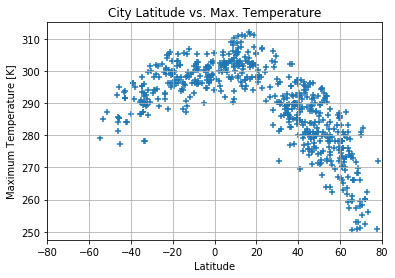

In [27]:
plt.scatter(df_city['Lat'],df_city['Max Temp'],marker='+')
plt.grid()
plt.title('City Latitude vs. Max. Temperature')
plt.xlabel('Latitude')
plt.xlim(-80,80)
plt.ylabel('Maximum Temperature [K]')
plt.savefig('output_data/TempVsLat.png')

#### Latitude vs. Humidity Plot

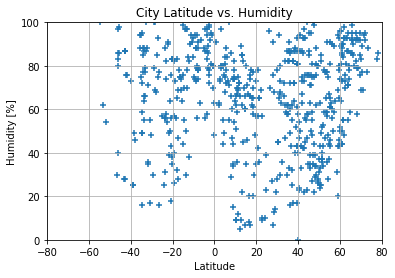

In [28]:
plt.scatter(df_city['Lat'],df_city['Humidity'],marker='+')
plt.grid()
plt.title('City Latitude vs. Humidity')
plt.xlabel('Latitude')
plt.xlim(-80,80)
plt.ylabel('Humidity [%]')
plt.ylim(0,100)
plt.savefig('output_data/HumidityVsLat.png')

#### Latitude vs. Cloudiness Plot

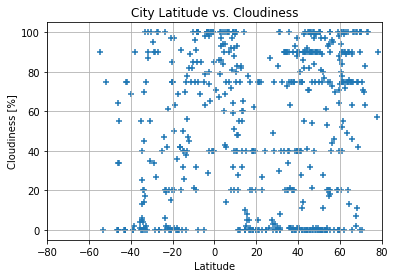

In [29]:
plt.scatter(df_city['Lat'],df_city['Cloudiness'],marker='+')
plt.grid()
plt.title('City Latitude vs. Cloudiness')
plt.xlabel('Latitude')
plt.xlim(-80,80)
plt.ylabel('Cloudiness [%]')
plt.savefig('output_data/CloudVsLat.png')

#### Latitude vs. Wind Speed Plot

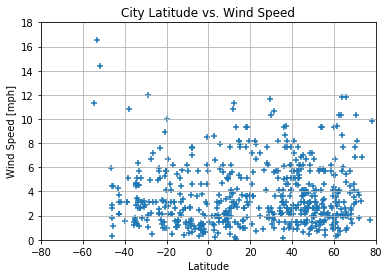

In [30]:
plt.scatter(df_city['Lat'],df_city['Wind Speed'],marker='+')
plt.grid()
plt.title('City Latitude vs. Wind Speed')
plt.xlabel('Latitude')
plt.xlim(-80,80)
plt.ylabel('Wind Speed [mph]')
plt.ylim(0,18)
plt.savefig('output_data/WindVsLat.png')